In [1]:
import os

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
%reload_ext importnb
import GANstructure

In [5]:
path='../data/camel/full_numpy_bitmap_camel.npy'

In [6]:
RUN_FOLDER='run/'
if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER,'images'))
    os.mkdir(os.path.join(RUN_FOLDER,'weights'))

In [7]:
def loader(path):
    dataset_size=5000
    dataset=np.load(path)
    no_of_images=dataset.shape[0]
    dataset=dataset.reshape(no_of_images,28,28,1)
    dataset=dataset[:dataset_size]
    dataset = dataset.astype('float32') / 255.0
    '''
    test 1
    arr = np.arange(10)
    np.random.shuffle(arr)
    print(arr)
    '''
    np.random.shuffle(dataset)
   
    return dataset

In [8]:
x=loader(path)
x=np.squeeze(x)

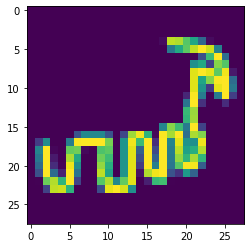

In [9]:
plt.imshow(x[50])
plt.show()

In [19]:
gan = GANstructure.GAN(input_dims = (28,28,1)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_activation = 'relu'
        , discriminator_dorpout = 0.4
        , discriminator_lr = 0.0008
        , generator_initial_dense_layer_size = (7, 7, 64)
        , generator_upsample = [2,2, 1, 1]
        , generator_conv_filters = [128,64, 64,1]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [1,1, 1, 1]
        , generator_activation = 'relu'
        , generator_dropout = None
        , generator_lr = 0.0004
        , optimizier = 'rmsprop'
        , latent_dims = 100
        )

TypeError: __init__() missing 1 required positional argument: 'discriminator_initial_dense_layer_size'